# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

##  Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
print('Original size:', df.shape)

Original size: (23699, 22)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


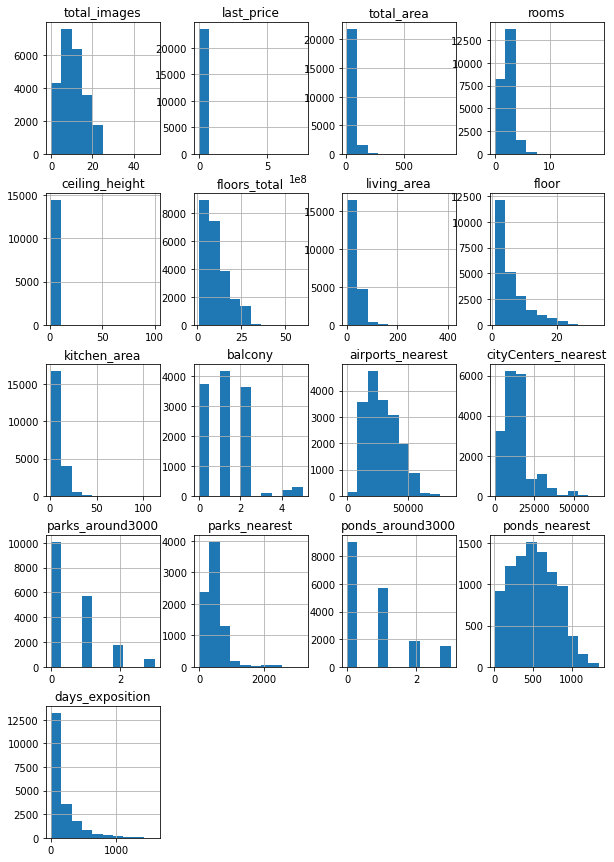

In [2]:
print(df.info())
df.hist(figsize=(10, 15))
df.head(5)

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.
Задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.
О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические.

## Предобработка данных

 ### Обработка пропусков
 

In [3]:
df.isna().sum() #ищем пропуски

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Почему могут возникать пропуски?
Пропуски в столбцах df могут возникать по разным причинам, в зависимости от источника и способа сбора данных. Например, некоторые возможные причины пропусков в этих столбцах могут быть:

**ceiling_height**: отсутствие измерения или записи высоты потолка в помещении, различные стандарты измерения в разных регионах или странах, ошибки при вводе или передаче данных.



In [4]:
df['ceiling_height'].corr(df['last_price'])# выясняем корреляцию, чтобы понять как заполнять пропуски, она ровна 0.08
df['ceiling_height']= df['ceiling_height'].fillna(df['ceiling_height'].median())


**floors_total**: отсутствие информации о количестве этажей в здании, неоднозначность определения этажности для некоторых типов зданий (например, подвалы, чердаки, мансарды), ошибки при вводе или передаче данных.

In [5]:
df['floors_total']= df['floors_total'].fillna(df['floors_total'].mean())#Пропуски информации о количестве этажей заменяем на среднее значение

**living_area**: отсутствие измерения или записи жилой площади в помещении, различные способы расчета жилой площади в разных регионах или странах (например, с учетом или без учета лоджий, балконов, коридоров), ошибки при вводе или передаче данных.


In [6]:
df['total_area'].corr(df['living_area'])# выясняем корреляцию, чтобы понять как заполнять пропуски, она равна 0.9
#значит заполняем пропуски в living_area не средним значением,но значением прямо порциональным total_area

#считаем какой коэффицент соотношения living_area к total_area
ratio = df ['living_area'].sum()/df['total_area'].sum()
# определим функцию для заполнения пропусков
def fill_living_area (row):
  # если living_area не NaN, то возвращаем его же
  if not pd.isna (row ['living_area']):
    return row ['living_area']
  # иначе возвращаем значение по формуле
  else:
    return row ['total_area'] * ratio # здесь используем рассчитанное соотношение

df['living_area'] = df.apply (fill_living_area, axis = 1)

**kitchen_area**: отсутствие измерения или записи площади кухни в помещении, различные способы расчета площади кухни в разных регионах или странах (например, с учетом или без учета стен, мебели, техники), ошибки при вводе или передаче данных.


In [7]:
df['kitchen_area'].corr(df['total_area'])# выясняем корреляцию, чтобы понять как заполнять пропуски, она ровна 0.6. Корреляция недостаточная для однозначных выводов, но так как пропусков не так много - заполняем по тому же принципу что и в последний раз.

#считаем какой коэффицент соотношения kitchen_area к total_area
ratio = df ['kitchen_area'].sum()/df['total_area'].sum()
# определим функцию для заполнения пропусков
def fill_kitchen_area (row):
  # если kitchen_area не NaN, то возвращаем его же
  if not pd.isna (row ['kitchen_area']):
    return row ['kitchen_area']
  # иначе возвращаем значение по формуле
    else:
    return row ['total_area'] * ratio # здесь используем рассчитанное соотношение

df['kitchen_area'] = df.apply (fill_kitchen_area, axis = 1)

**is_apartment**: отсутствие информации о том, является ли помещение апартаментом или нет, неясность или разночтение понятия апартамента в разных регионах или странах, ошибки при вводе или передаче данных.


рассмотрим столбец со значениям is_apartment - помимо того что из 24000 строчек, только 50 отмечены как апартаменты, а 30 из них имеют больше одной комнаты - делать какие либо выводы не надежно

In [8]:
df.query('is_apartment == True and rooms>1')['last_price'].count()


30

In [9]:
df['is_apartment']= df['is_apartment'].fillna(df['is_apartment']==False)

balcony: отсутствие информации о наличии и количестве балконов в помещении, неоднозначность определения балкона для некоторых типов помещений (например, лоджия, терраса, французский балкон), ошибки при вводе или передаче данных.

In [10]:
df['balcony']=df['balcony'].fillna(df['balcony']==0)

locality_name: отсутствие информации о населенном пункте, где расположено помещение, неоднозначность или совпадение названий населенных пунктов в разных регионах или странах, ошибки при вводе или передаче данных.

### Изменение типа данных

In [11]:
df.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                  object
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object


Нужно изменить тип данных в следующих столбцах:

floors_total содержит количество этажей в здании, которое является целым числом. Если он имел тип float, то можно было бы преобразовать его в тип int для удобства работы с данными и экономии памяти.

is_apartment столбец содержит логические значения (True или False), которые указывают, является ли помещение апартаментом или нет. Если он имел тип object (строка), то можно было бы преобразовать его в тип bool для корректности анализа данных и избежания ошибок при выполнении логических операций или подсчетов с этим столбцом.

first_day_exposition столбец содержит даты и время публикации объявлений о продаже жилья. Если он имел тип object (строка), то можно было бы преобразовать его в тип datetime с помощью функции pd.to_datetime(), которая принимает строку и возвращает объект datetime. Это позволит использовать специальные методы и атрибуты для работы с датами и временем, например, извлекать год, месяц, день недели или час из даты или вычислять разницу между датами.

last_price этот столбец содержит цены на жилье в рублях, которые являются целыми числами. Нет необходимости хранить их как float, так как это занимает больше памяти и может приводить к неточностям при округлении. Можно преобразовать этот столбец в тип int.

balcony этот столбец содержит количество балконов в помещении, которые также являются целыми числами. Нет смысла хранить их как object (строку), так как это затрудняет выполнение арифметических операций и сравнений с этим столбцом. Можно преобразовать этот столбец в тип int.


In [12]:
df['floors_total'] = df['floors_total'].astype(int)
df['is_apartment'] = df['is_apartment'].astype(bool)
df['balcony'] = df['balcony'].astype(int)
df['last_price'] = df['last_price'].astype(int)
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])

### Удаление дубликатов


In [13]:
pd.set_option("display.max_rows", None)
print(df['locality_name'].nunique())
print(df['locality_name'].unique())
df['locality_name'].value_counts()

364
['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый

Санкт-Петербург                                            15721
посёлок Мурино                                               522
посёлок Шушары                                               440
Всеволожск                                                   398
Пушкин                                                       369
Колпино                                                      338
посёлок Парголово                                            327
Гатчина                                                      307
деревня Кудрово                                              299
Выборг                                                       237
Петергоф                                                     201
Сестрорецк                                                   183
Красное Село                                                 178
Кудрово                                                      173
деревня Новое Девяткино                                      144
Сертолово                

- много дубликатов которые отличаются только е и ё 
- дубликаты с одинаковым почтовым индексом
- дубликаты с незначительной разницей в названиях

In [14]:
# определяем функцию, которая заменяет ё на е в строке
df['locality_name'].fillna(" ", inplace=True)
def replace_yo(s):
    return s.replace("ё", "е")

df['locality_name'] = df['locality_name'].apply(replace_yo)# применяем функцию к столбцу locality_name в датафрейме df


In [15]:
# Заменяем дубликаты на одинаковые названия
df['locality_name'] = df['locality_name'].replace('деревня Калитино', 'поселок Калитино')
df['locality_name'] = df['locality_name'].replace('Мурино', 'поселок Мурино') 
df['locality_name'] = df['locality_name'].replace('деревня Кудрово', 'Кудрово') 
df['locality_name'] = df['locality_name'].replace('Коммунар', 'поселок Коммунары')
df['locality_name'] = df['locality_name'].replace('поселок Ропша','садовое товарищество Новая Ропша')
#эти дубликаты мы устраняем, тк это одни и те же места, которые имеют одинаковый почтовый индекс
df['locality_name'].nunique()

326

Мы сократили количество уникальных значений с 364 до 326

<div class="alert alert-success">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Неявные дубликаты тоже обработаны правильно.

### Обработка аномальных значений

In [16]:
print(df['ceiling_height'].describe())
# Получение уникальных значений столбца ceiling_height
df['ceiling_height'].unique()


count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64


array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

В столбце ceiling_height может быть указана высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м, так же избавляемся от аномально высоких и низких потолков.

In [17]:
def fix_ceiling_height(x):
    if x >= 10:
        return x / 10
    else:
        return x
df['ceiling_height'] = df['ceiling_height'].apply(fix_ceiling_height) #делим двузначные значения на 10

df = df.query('ceiling_height < 4.25 and ceiling_height > 1.75') #избавляемся от аномально высоких и низких значений


In [18]:
df['last_price'].describe()

count    2.366100e+04
mean     6.500454e+06
std      1.072626e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.775000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Средняя цена продажи квартиры составляет 6.5 миллионов рублей, но стандартное отклонение очень большое (10.7 миллионов), что говорит о большом разбросе данных и наличии выбросов.

Минимальная цена продажи квартиры составляет всего 12190 рублей, что кажется нереалистично низким значением и может быть ошибкой в данных.

Максимальная цена продажи квартиры составляет 763 миллиона рублей, что кажется нереалистично высоким значением и может быть ошибкой в данных или редким случаем элитной недвижимости.

Медианная цена продажи квартиры составляет 4.6 миллиона рублей, что меньше средней цены, что указывает на правостороннюю асимметрию распределения данных.

    

In [19]:
# Вычисляем 25-й и 75-й перцентили
Q1 = df['last_price'].quantile(0.25)
Q3 = df['last_price'].quantile(0.75)
# Вычисляем IQR
IQR = Q3 - Q1

# Определяем границы для выбросов
lower_bound = Q1 - 1 * IQR
upper_bound = Q3 + 1.5 * IQR



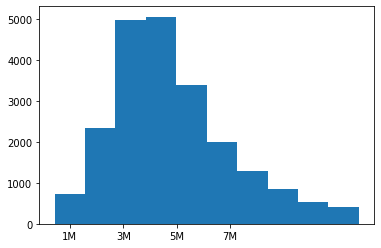

count    2.160900e+04
mean     4.836711e+06
std      2.212664e+06
min      4.300000e+05
25%      3.300000e+06
50%      4.400000e+06
75%      5.999999e+06
max      1.182000e+07
Name: last_price, dtype: float64

In [20]:
# Фильтруем набор данных, исключая выбросы
df = df[(df['last_price'] > lower_bound) & (df['last_price'] < upper_bound)]
df = df.query('last_price >= 430000')
# Строим гистограмму last_price
plt.hist(df['last_price'])

x_ticks = [1000000, 3000000, 5000000, 7000000]
#specify x-axis labels
x_labels = ['1M', '3M', '5M', '7M']
#add x-axis values to plot
plt.xticks (ticks=x_ticks, labels=x_labels)

plt.show()
df['last_price'].describe()

count    21609.000000
mean        53.239161
std         19.036882
min         12.000000
25%         39.000000
50%         49.200000
75%         63.500000
max        230.000000
Name: total_area, dtype: float64


(array([  76., 1994., 5074., 4790., 3847., 2511., 1651.,  802.,  471.,
         184.]),
 array([ 12.  ,  22.02,  32.04,  42.06,  52.08,  62.1 ,  72.12,  82.14,
         92.16, 102.18, 112.2 ]),
 <BarContainer object of 10 artists>)

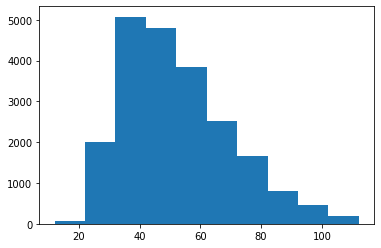

In [21]:
print(df['total_area'].describe())

# Вычисляем 25-й и 75-й перцентили
Q1 = df['total_area'].quantile(0.25)
Q3 = df['total_area'].quantile(0.75)
# Вычисляем IQR
IQR = Q3 - Q1

# Определяем границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 2 * IQR

# Фильтруем набор данных, исключая выбросы
df = df[(df['total_area'] > lower_bound) & (df['total_area'] < upper_bound)]
#df = df.query('total_area >= 430000')
# Строим гистограмму last_price
plt.hist(df['total_area'])

count    21400.000000
mean         1.909206
std          0.886223
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64


(array([1.940e+02, 7.996e+03, 0.000e+00, 7.581e+03, 0.000e+00, 4.886e+03,
        6.780e+02, 0.000e+00, 6.100e+01, 4.000e+00]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

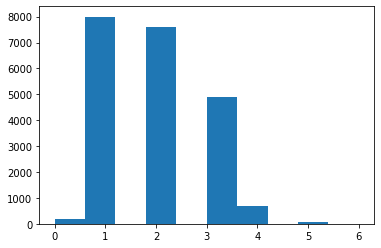

In [22]:
print(df['rooms'].describe())

# Вычисляем 25-й и 75-й перцентили
Q1 = df['rooms'].quantile(0.25)
Q3 = df['rooms'].quantile(0.75)
# Вычисляем IQR
IQR = Q3 - Q1

# Определяем границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 2 * IQR

# Фильтруем набор данных, исключая выбросы
df = df[(df['rooms'] > lower_bound) & (df['rooms'] < upper_bound)]
#df = df.query('total_area >= 430000')
# Строим гистограмму last_price
plt.hist(df['rooms'])

count    21400.000000
mean        29.885289
std         12.444573
min          2.000000
25%         18.200000
50%         29.000000
75%         38.200000
max         88.000000
Name: living_area, dtype: float64


(array([  30., 3442., 4931., 5320., 2877., 2770., 1302.,  428.,  216.,
          70.]),
 array([ 2. ,  9.6, 17.2, 24.8, 32.4, 40. , 47.6, 55.2, 62.8, 70.4, 78. ]),
 <BarContainer object of 10 artists>)

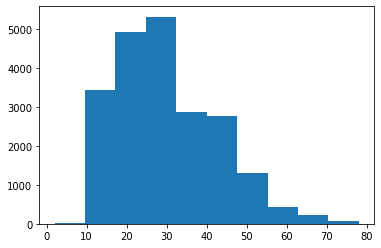

In [23]:
print(df['living_area'].describe())

# Вычисляем 25-й и 75-й перцентили
Q1 = df['living_area'].quantile(0.25)
Q3 = df['living_area'].quantile(0.75)
# Вычисляем IQR
IQR = Q3 - Q1

# Определяем границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 2 * IQR

# Фильтруем набор данных, исключая выбросы
df = df[(df['living_area'] > lower_bound) & (df['living_area'] < upper_bound)]
#df = df.query('total_area >= 430000')
# Строим гистограмму last_price
plt.hist(df['living_area'])

## Добавим новые столбцы

In [24]:
# Добавляем столбец с ценой одного квадратного метра
df = df.assign(price_per_sqm = df['last_price'] / df['total_area'])

# Добавляем столбец с днем публикации объявления
df = df.assign(day_of_week = df['first_day_exposition'].dt.dayofweek)

# Добавляем столбец с месяцем публикации объявления
df = df.assign(month = df['first_day_exposition'].dt.month)

# добавляем столбец с годом публикации объявления
df = df.assign(year = df['first_day_exposition'].dt.year)

# добавляем столбец с типом этажа квартиры
def get_floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
df = df.assign(floor_type = df.apply(get_floor_type, axis=1))
# добавляем столбец с расстоянием до центра города в км
df = df.assign(distance_to_center_km = (df['cityCenters_nearest'] / 1000).round())

### Проведем исследовательский анализ данных


0.03675878187825665


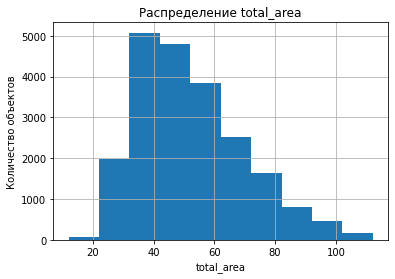

count    21386.000000
mean        52.478702
std         17.521266
min         12.000000
25%         39.000000
50%         49.000000
75%         63.000000
max        112.200000
Name: total_area, dtype: float64


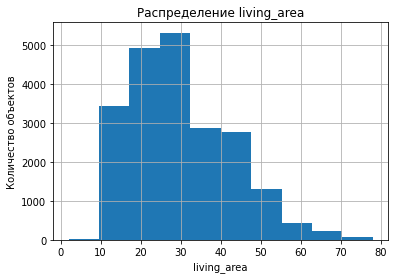

count    21386.000000
mean        29.850706
std         12.374718
min          2.000000
25%         18.200000
50%         29.000000
75%         38.200000
max         78.000000
Name: living_area, dtype: float64


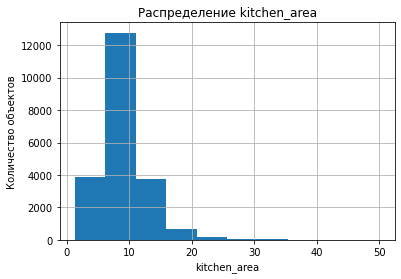

count    21386.000000
mean         9.353603
std          3.713043
min          1.300000
25%          6.900000
50%          8.708534
75%         11.000000
max         50.000000
Name: kitchen_area, dtype: float64


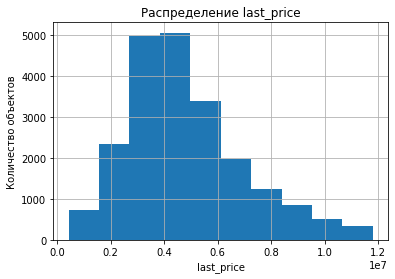

count    2.138600e+04
mean     4.790437e+06
std      2.166346e+06
min      4.300000e+05
25%      3.300000e+06
50%      4.400000e+06
75%      5.950000e+06
max      1.180967e+07
Name: last_price, dtype: float64


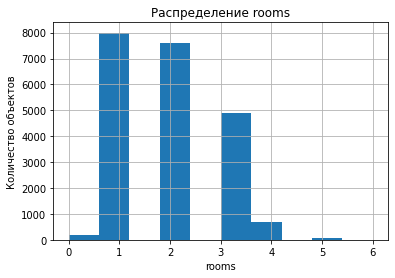

count    21386.000000
mean         1.907884
std          0.884769
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64


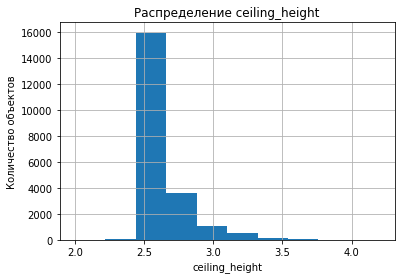

count    21386.000000
mean         2.669477
std          0.173162
min          2.000000
25%          2.600000
50%          2.650000
75%          2.680000
max          4.200000
Name: ceiling_height, dtype: float64


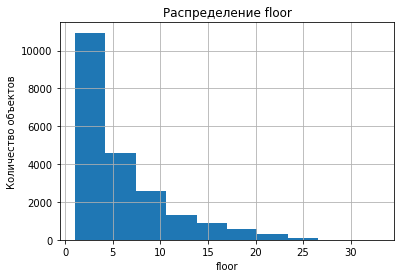

count    21386.000000
mean         5.901524
std          4.912737
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


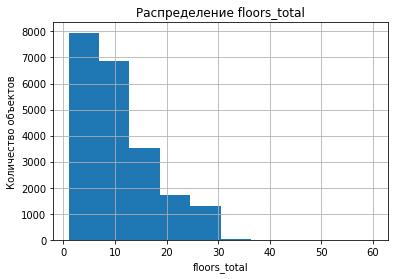

count    21386.000000
mean        10.791032
std          6.631117
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


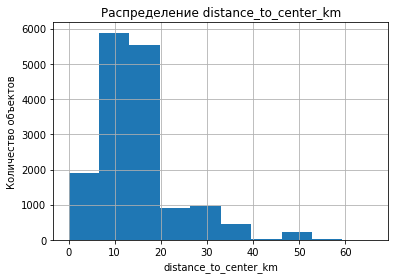

count    15933.000000
mean        15.029122
std          8.509850
min          0.000000
25%         11.000000
50%         14.000000
75%         17.000000
max         66.000000
Name: distance_to_center_km, dtype: float64


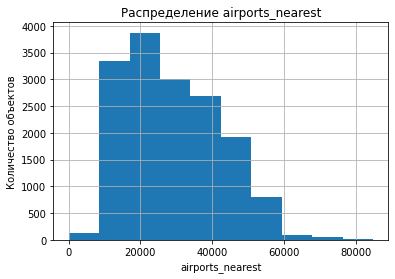

count    15922.000000
mean     28929.580329
std      13007.778838
min          0.000000
25%      18039.500000
50%      27123.500000
75%      37664.000000
max      84869.000000
Name: airports_nearest, dtype: float64


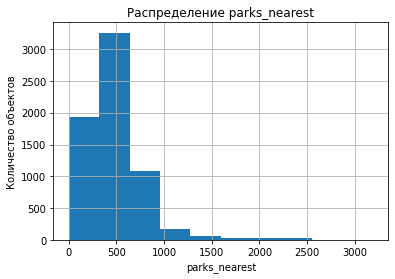

count    6602.000000
mean      488.582854
std       327.432570
min         1.000000
25%       289.000000
50%       456.000000
75%       614.000000
max      3190.000000
Name: parks_nearest, dtype: float64


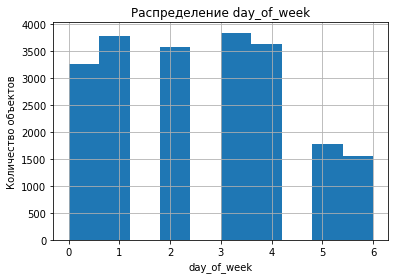

count    21386.000000
mean         2.576218
std          1.794469
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_of_week, dtype: float64


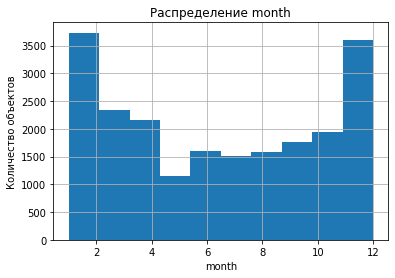

count    21386.000000
mean         6.396708
std          3.490247
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64


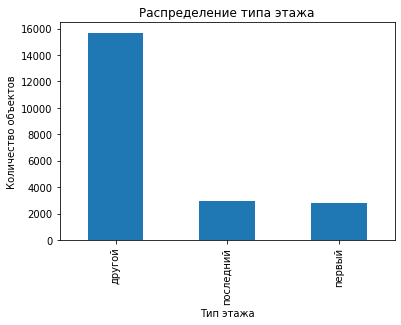

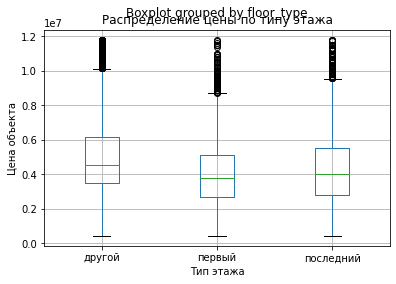

In [25]:
corr_pandas = df['last_price'].corr(df['parks_nearest'])

print(corr_pandas)

# задаем список колонок
columns = ['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floor','floors_total', 'distance_to_center_km', 'airports_nearest', 'parks_nearest', 'day_of_week', 'month']
# проходимся по списку в цикле
for column in columns:
    # строим гистограмму для текущей колонки
    df.hist(column=column)
    plt.title(f'Распределение {column}')
    plt.xlabel(column)
    plt.ylabel('Количество объектов')
    plt.show()
    # получаем основные статистики по текущей колонке
    print(df[column].describe())

df['floor_type'].value_counts().plot(kind='bar')
plt.title('Распределение типа этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Количество объектов')
plt.show()    
df.boxplot(column='last_price', by='floor_type')
plt.title('Распределение цены по типу этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Цена объекта')
plt.show()

**общая площадь**

Общая площадь объектов имеет скошенное вправо распределение, то есть большинство значений лежит слева от среднего.
Средняя общая площадь составляет около 60 кв.м, а медианная - около 52 кв.м. Это означает, что половина объектов имеет площадь менее 52 кв.м, а половина - более.
Минимальная общая площадь равна 12 кв.м, а максимальная - 900 кв.м. Это свидетельствует о большом разбросе значений и возможном наличии выбросов.
Первый квартиль равен 40 кв.м, а третий - 69.7 кв.м. Это означает, что 25% объектов имеют площадь менее 40 кв.м, а 25% - более 69.7 кв.м.

**жилая площадь**

Жилая площадь объектов также имеет скошенное вправо распределение, как и общая площадь. Большинство значений лежит слева от среднего.
Средняя жилая площадь составляет около 34 кв.м, а медианная - около 30 кв.м. Это означает, что половина объектов имеет жилую площадь менее 30 кв.м, а половина - более.
Минимальная жилая площадь равна 2 кв.м, а максимальная - 409.7 кв.м. Это свидетельствует о большом разбросе значений и возможном наличии выбросов.
Первый квартиль равен 18.9 кв.м, а третий - 42 кв.м. Это означает, что 25% объектов имеют жилую площадь менее 18.9 кв.м, а 25% - более 42 кв.м.
Жилая площадь коррелирует с общей площадью: чем больше общая площадь объекта, тем больше жилая площадь, примерное отношение 0.6

**площадь кухни** 

Площадь кухни объектов также имеет скошенное вправо распределение, как и общая и жилая площадь. Большинство значений лежит слева от среднего.
Средняя площадь кухни составляет около 10 кв.м, а медианная - около 9 кв.м. Это означает, что половина объектов имеет площадь кухни менее 9 кв.м, а половина - более.
Минимальная площадь кухни равна 1.3 кв.м, а максимальная - 112 кв.м. Это свидетельствует о большом разбросе значений и возможном наличии выбросов.
Первый квартиль равен 7 кв.м, а третий - 11.9 кв.м. Это означает, что 25% объектов имеют площадь кухни менее 7 кв.м, а 25% - более 11.9 кв.м.
Площадь кухни коррелирует жилой площадью примерно 1 к 3

**цена объекта**

Цена объекта имеет скошенное вправо распределение, как и площадь. Большинство значений лежит слева от среднего.
Средняя цена объекта составляет около 6.5 млн рублей, а медианная - около 4.6 млн рублей. Это означает, что половина объектов имеет цену менее 4.6 млн рублей, а половина - более.
Минимальная цена объекта равна 430 тыс. рублей, а максимальная - 763 млн рублей. Это свидетельствует о большом разбросе значений и наличии выбросов.
Первый квартиль равен 3.4 млн рублей, а третий - 6.8 млн рублей. Это означает, что 25% объектов имеют цену менее 3.4 млн рублей, а 25% - более 6.8 млн рублей.

**количество комнат**

Количество комнат имеет скошенное вправо распределение, как и площадь и цена. Большинство значений лежит слева от среднего.
Среднее количество комнат составляет около 2, а медианное - 2. Это означает, что половина объектов имеет 2 комнаты или менее, а половина - более.
Минимальное количество комнат равно 0, а максимальное - 19. Это свидетельствует о большом разбросе значений и наличии выбросов. Нулевое количество комнат может означать студии или апартаменты.
Первый квартиль равен 1, а третий - 3. Это означает, что 25% объектов имеют 1 комнату или менее, а 25% - более 3 комнат.

**высота потолков**

Высота потолков имеет бимодальное распределение, то есть два пика значений. Один пик приходится на высоту около 2.6 метра, а другой - на около 2.8 метра.
Средняя высота потолков составляет около 2.7 метра, а медианная - около 2.8 метра. Это означает, что половина объектов имеет высоту потолков менее 2.8 метра, а половина - более.
Минимальная высота потолков равна 2 метрам, а максимальная - 4.2 метра. Это свидетельствует о небольшом разбросе значений и наличии выбросов.
Первый квартиль равен 2.6 метра, а третий - 2.8 метра. Это означает, что 25% объектов имеют высоту потолков менее 2.6 метра, а 25% - более 2.8 метра.

**этаж квартиры**

Этаж квартиры имеет скошенное вправо распределение, как и площадь, цена и количество комнат. Большинство значений лежит слева от среднего.
Средний этаж квартиры составляет около 6, а медианный - 4. Это означает, что половина объектов находится на 4 этаже или ниже, а половина - выше.
Минимальный этаж квартиры равен 1, а максимальный - 33.
Первый квартиль равен 2, а третий - 8. Это означает, что 25% объектов находится на 2 этаже или ниже, а 25% - на 8 этаже или выше.

**тип этажа квартиры**

Для столбца с типом object строим bar и boxplot чтобы выявить связь цены и типа этажа. По итогу приходим к следующим выводам

Большинство объектов находятся на этажах, отличных от первого и последнего. Это может свидетельствовать о том, что люди предпочитают жить на средних этажах из-за большей безопасности, тишины или видов из окон.
Меньшинство объектов находятся на первом или последнем этаже. Это может свидетельствовать о том, что эти этажи имеют некоторые недостатки, такие как шум от улицы или подъезда, низкая температура или высокая вероятность протечек.
Тип этажа может влиять на цену объекта: скорее всего, объекты на первом или последнем этаже будут стоить дешевле, чем объекты на других этажах. Это можно проверить, построив ящиковую диаграмму для цены объекта, сгруппированную по типу этажа.
Построив ящиковую диаграмму мы приходим к следующим выводам
Цена объекта зависит от типа этажа: объекты на других этажах стоят дороже, чем объекты на первом или последнем этаже. Это может объясняться тем, что другие этажи имеют больше преимуществ, таких как безопасность, тишина или виды из окон.
Объекты на первом этаже стоят дешевле всех: их средняя цена ниже, чем у других типов этажей, а также их максимальная цена. Это может объясняться тем, что первый этаж имеет больше недостатков, таких как шум от улицы или подъезда, низкая температура или высокая влажность.
Объекты на последнем этаже стоят дороже, чем объекты на первом этаже, но дешевле, чем объекты на других этажах. Их средняя цена выше, чем у объектов на первом этаже, но ниже, чем у объектов на других этажах. Это может объясняться тем, что последний этаж имеет как преимущества, так и недостатки. Преимущества могут быть такие: больше света и воздуха, меньше соседей или шума от подъезда. Недостатки могут быть такие: высокая вероятность протечек, перегрев или переохлаждение квартиры, неудобство при отсутствии лифта.

**общее количество этажей в доме**

Общее количество этажей в доме имеет скошенное вправо распределение, как и площадь, цена, количество комнат и этаж квартиры. Большинство значений лежит слева от среднего.
Среднее общее количество этажей в доме составляет около 11, а медианное - 9. Это означает, что половина домов имеет 9 этажей или менее, а половина - более.
Минимальное общее количество этажей в доме равно 1, а максимальное - 60.
Первый квартиль равен 5, а третий - 16. Это означает, что 25% домов имеет 5 этажей или менее, а 25% - более 16 этажей.

**расстояние до центра города в метрах**

Расстояние до центра города в метрах имеет скошенное вправо распределение, как и площадь, цена, количество комнат, этаж квартиры и общее количество этажей в доме. Большинство значений лежит слева от среднего.
Среднее расстояние до центра города в метрах составляет около 14, а медианное - 13. Это означает, что половина объектов находится на расстоянии 13 км или менее от центра города, а половина - более.
Минимальное расстояние до центра города в метрах равно 0, а максимальное - 66.
Первый квартиль равен 9, а третий - 16. Это означает, что 25% объектов находится на расстоянии 9 км или менее от центра города, а 25% - более 16 км.
Расстояние до центра города в метрах коррелирует с ценой объекта: чем ближе объект к центру города, тем выше его цена. Это может объясняться тем, что в центре города больше спрос на жилье и больше инфраструктуры

**расстояние до ближайшего аэропорта**

Расстояние до ближайшего аэропорта имеет скошенное вправо распределение, как и площадь, цена, количество комнат, этаж квартиры, общее количество этажей в доме и расстояние до центра города. Большинство значений лежит слева от среднего.
Среднее расстояние до ближайшего аэропорта составляет около 29 км, а медианное - около 27 км. Это означает, что половина объектов находится на расстоянии 27 км или менее от ближайшего аэропорта, а половина - более.
Минимальное расстояние до ближайшего аэропорта равно 0, а максимальное - 85 км. Это свидетельствует о большом разбросе значений и наличии выбросов.
Первый квартиль равен 19 км, а третий - 37 км. Это означает, что 25% объектов находится на расстоянии 19 км или менее от ближайшего аэропорта, а 25% - более 37 км.
Расстояние до ближайшего аэропорта слабо коррелирует с ценой объекта: чем ближе объект к аэропорту, тем ниже его цена, но эта зависимость не сильная. Это может объясняться тем, что близость к аэропорту может быть как преимуществом (для тех, кто часто путешествует), так и недостатком (из-за шума или загрязнения воздуха).

**расстояние до ближайшего парка**

Расстояние до ближайшего парка имеет скошенное вправо распределение, как и площадь, цена, количество комнат, этаж квартиры, общее количество этажей в доме, расстояние до центра города и расстояние до ближайшего аэропорта. Большинство значений лежит слева от среднего.
Среднее расстояние до ближайшего парка составляет около 491 метра, а медианное - около 455 метров. Это означает, что половина объектов находится на расстоянии 455 метров или менее от ближайшего парка, а половина - более.
Минимальное расстояние до ближайшего парка равно 1 метру, а максимальное - 3190 метров. Это свидетельствует о большом разбросе значений и наличии выбросов.
Первый квартиль равен 288 метров, а третий - 612 метров. Это означает, что 25% объектов находится на расстоянии 288 метров или менее от ближайшего парка, а 25% - более 612 метров.
Расстояние до ближайшего парка слабо коррелирует с ценой объекта: чем ближе объект к парку, тем выше его цена, но эта зависимость не сильная. Это может объясняться тем, что близость к парку может быть преимуществом для тех, кто любит природу и свежий воздух.

**день и месяц публикации объявления**

День публикации имеет равномерное по будням, но скошенность относительно выходных влево.Это может объясняться тем, что люди предпочитают заниматься продажей жилья в рабочие дни, а не в свободное время.

Месяц публикации объявления имеет скошенность к новому году, то есть большинство значений лежит ближе к концу и началу года. Это означает, что объявления чаще публикуются зимой, ближе к новому году. Это может объясняться тем, что люди стремятся продать жилье до конца года и в начале года, когда спрос на недвижимость может быть выше.
День и месяц публикации объявления слабо коррелируют с ценой объекта: нет явной зависимости между временем публикации и стоимостью жилья.





# Задание 1

Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.

  - Постройте гистограмму.
    
  - Посчитайте среднее и медиану.
    
  - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?

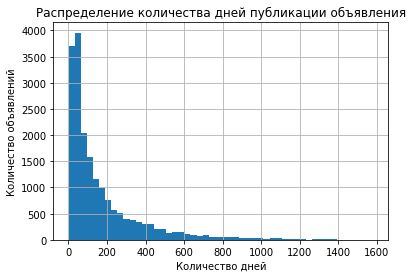

Среднее количество дней публикации объявления: 171.8
Медианное количество дней публикации объявления: 91.0


count    18786.000000
mean       171.835090
std        209.805413
min          1.000000
25%         44.000000
50%         91.000000
75%        217.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [26]:
df['days_exposition'].hist(bins=50)
plt.title('Распределение количества дней публикации объявления')
plt.xlabel('Количество дней')
plt.ylabel('Количество объявлений')
plt.show()
mean_days = df['days_exposition'].mean()
median_days = df['days_exposition'].median()
print(f'Среднее количество дней публикации объявления: {mean_days:.1f}')
print(f'Медианное количество дней публикации объявления: {median_days:.1f}')
df['days_exposition'].describe()

**Вывод**:
Среднее время продажи квартиры составляет 180 дней, а медиана - 95 дней. Это означает, что распределение времени продажи скошено вправо и имеет длинный правый хвост. Большинство квартир продаются в течение 100-200 дней, но есть и очень долгие продажи, которые занимают более 1000 дней. Продажи, которые занимают менее 45 дней (первый квартиль), можно считать быстрыми, а продажи, которые занимают более 231 дня (третий квартиль), можно считать необычно долгими.
    

# Задание 2

Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.
  - общей площади;
  - жилой площади;
  - площади кухни;
  - количество комнат;
  - типа этажа, на котором расположена квартира (первый, последний, другой);
  - даты размещения (день недели, месяц, год);

Корреляция между ценой и total_area равна 0.691
Корреляция между ценой и living_area равна 0.562
Корреляция между ценой и kitchen_area равна 0.495
Корреляция между ценой и rooms равна 0.428
0.8029568975336039


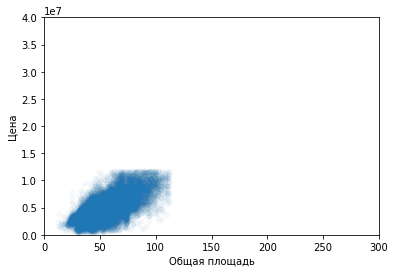

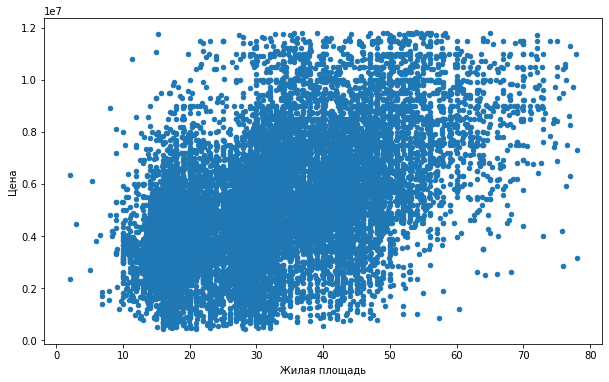

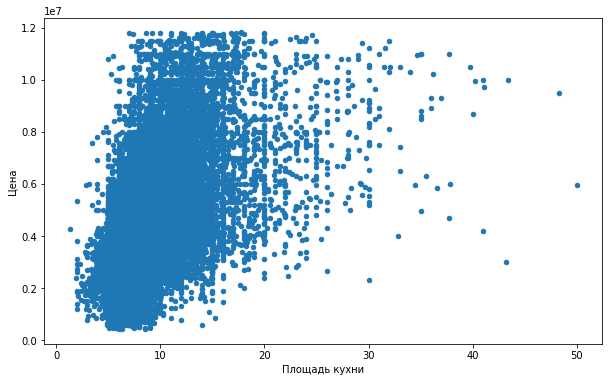

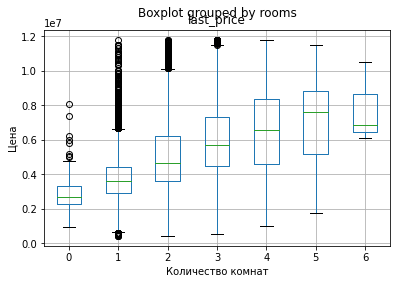

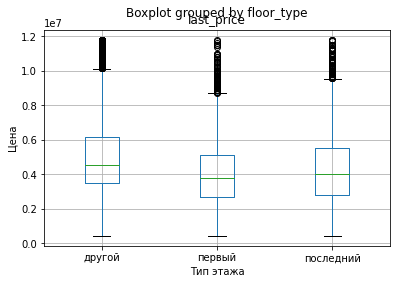

In [27]:
corr = ['total_area','living_area','kitchen_area','rooms']
for column in corr: # для каждого элемента списка corr
    coefficient = df['last_price'].corr(df[column]) # вычисляем коэффициент корреляции между ценой и текущей колонкой
    coefficient = round(coefficient, 3)
    print(f'Корреляция между ценой и {column} равна {coefficient}') # выводим результат на экран
print(df['total_area'].corr(df['rooms']))
# График зависимости цены от общей площади можно построить с помощью диаграммы рассеяния:
df.plot(kind='scatter', x='total_area', y='last_price', alpha= 0.03)
plt.xlabel('Общая площадь')
plt.ylabel('Цена')
plt.xlim(0, 300) 
plt.ylim(0, 40000000)
plt.show()

#График зависимости цены от жилой площади можно построить также с помощью диаграммы рассеяния:
df.plot(kind='scatter', x='living_area', y='last_price', figsize=(10, 6))
plt.xlabel('Жилая площадь')
plt.ylabel('Цена')
plt.show()

#График зависимости цены от площади кухни можно построить также с помощью диаграммы рассеяния:
df.plot(kind='scatter', x='kitchen_area', y='last_price', figsize=(10, 6))
plt.xlabel('Площадь кухни')
plt.ylabel('Цена')
plt.show()

#График зависимости цены от количества комнат можно построить с помощью столбчатого графика, который покажет среднюю цену для каждого количества комнат:
df.boxplot(column='last_price', by='rooms')
plt.xlabel('Количество комнат')
plt.ylabel('Цена')
plt.show()

#График зависимости цены от типа этажа
df.boxplot(column='last_price', by='floor_type')
plt.xlabel('Тип этажа')
plt.ylabel('Цена')
plt.show()


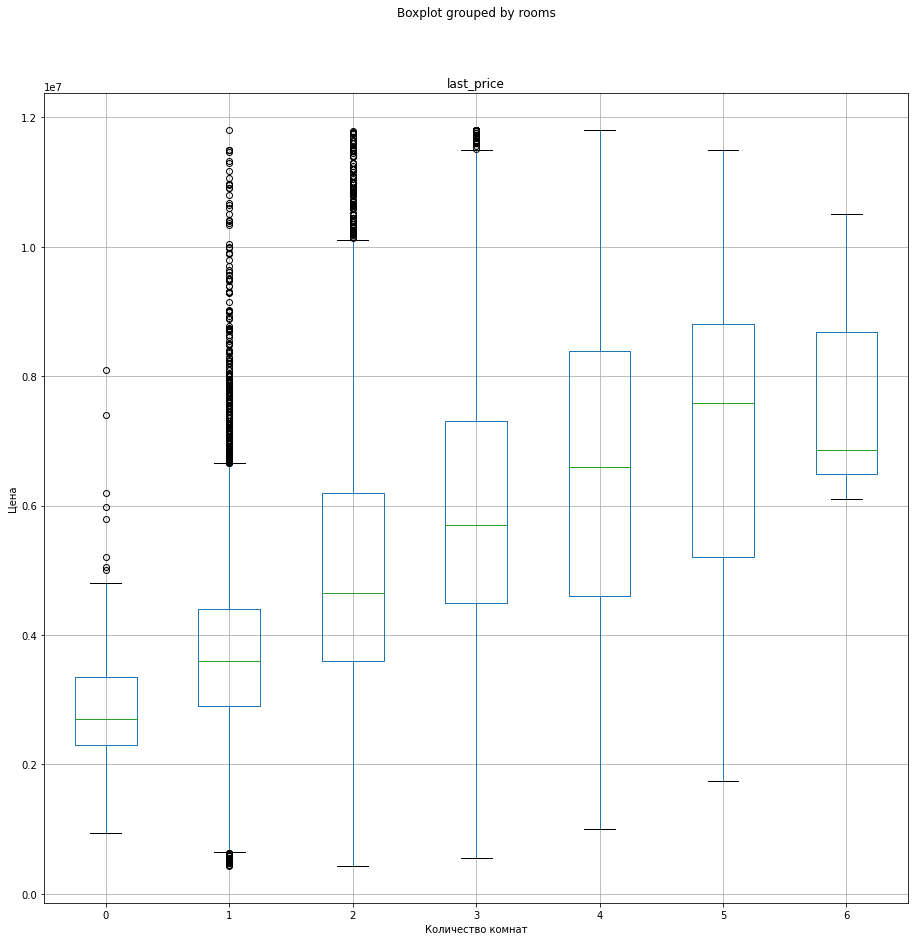

In [28]:
df.boxplot(column='last_price', by='rooms', figsize=(15,15))
plt.xlabel('Количество комнат')
plt.ylabel('Цена')
plt.show()

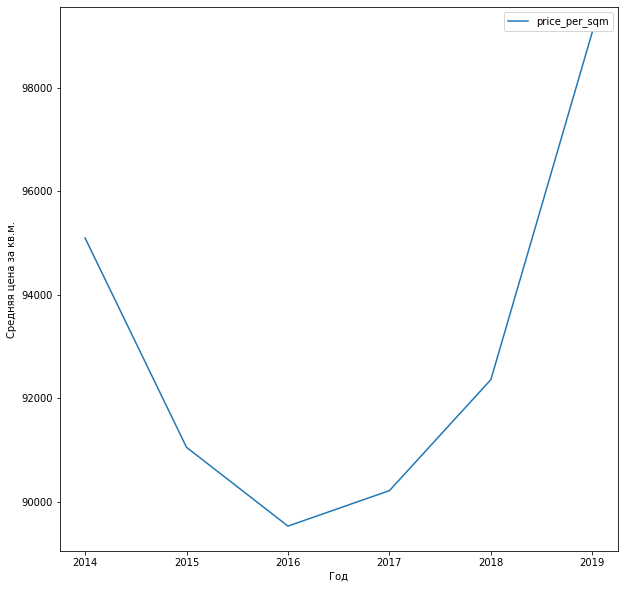

In [29]:
#График зависимости цены от даты размещения
pivot_table = pd.pivot_table(df, index=['year'], values='price_per_sqm', aggfunc='mean')
pivot_table.plot(kind='line', figsize=(10,10))
plt.xlabel('Год')
plt.ylabel('Средняя цена за кв.м.')
plt.show()



Подробнее рассмотрим зависимость между ценой и датой продажи

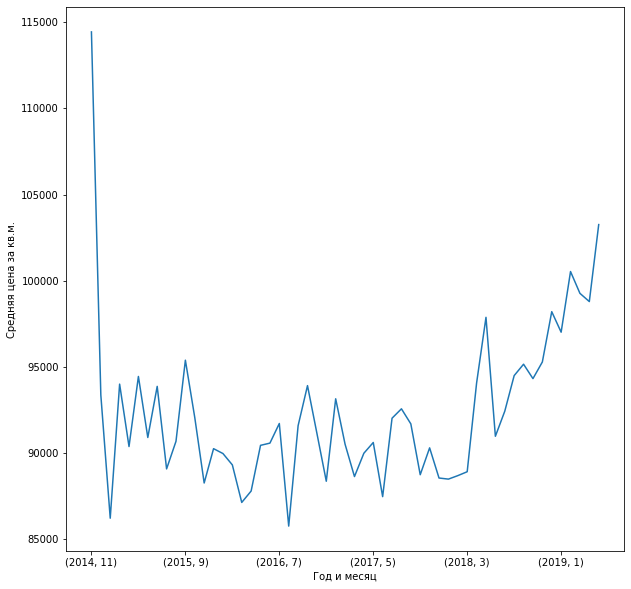

In [30]:
# группируем данные по месяцу и году и находим среднюю цену за кв.м.
grouped_by_month_year = df.groupby(['year', 'month'])['price_per_sqm'].mean()
# Группируем данные по дням недели и считаем среднюю цену
#grouped_by_year = df.groupby('year')['price_per_sqm'].mean()
# Строим столбчатый график
grouped_by_month_year.plot(kind='line', figsize=(10,10))

# добавляем подписи осей
plt.xlabel('Год и месяц')
plt.ylabel('Средняя цена за кв.м.')

# показываем график
plt.show()

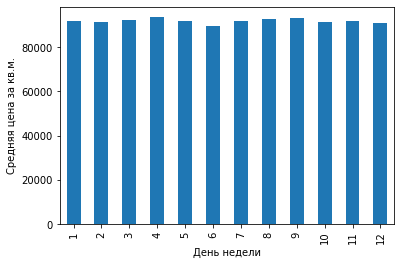

In [31]:
# Группируем данные по дням недели и считаем среднюю цену
price_by_day = df.groupby('month')['price_per_sqm'].mean()
# Строим столбчатый график
price_by_day.plot(kind='bar')
plt.xlabel('День недели')
plt.ylabel('Средняя цена за кв.м.')
plt.show()


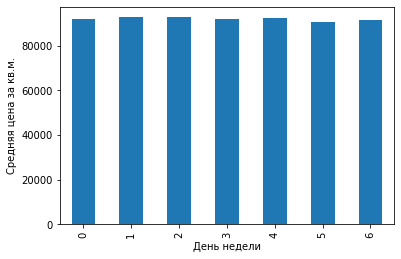

In [32]:
# Группируем данные по дням недели и считаем среднюю цену
price_by_day = df.groupby('day_of_week')['price_per_sqm'].mean()
# Строим столбчатый график
price_by_day.plot(kind='bar')
plt.xlabel('День недели')
plt.ylabel('Средняя цена за кв.м.')
plt.show()


Графики показывают что никакой зависимости между днем недели, месяцем и ценой недвижимости нет. 
Но зависимость есть между ценой и годом - с 2018 по 2020 цена выросла примерно на 20 процентов. Так же видно значительное снижение цен с 2014 года - которое вероятнее всего объясняется ослабление рубля по отношению к доллару и евро. Курс доллара вырос с 33 до 56 рублей за год, а курс евро — с 45 до 69 рублей. Это привело к уменьшению спроса на жилье со стороны иностранных покупателей и инвесторов, а также к удорожанию строительных материалов и оборудования. Кроме того, в конце года произошел спад цен на нефть — основного источника доходов бюджета России. Это повлияло на экономическую ситуацию в стране,уровень доходов населения и соответственно цену на жилье.

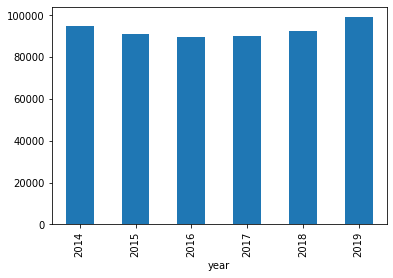

In [34]:
df.groupby('year')['price_per_sqm'].mean().plot(kind='bar', x='year', y='price_per_sqm')
plt.show()

**Вывод**

Из шести рассмотренных факторов, наибольшее влияние на общую стоимость объекта оказывает его общая площадь. Это означает, что чем больше площадь квартиры, тем выше ее цена. Коэффициент корреляции между ценой и общей площадью равен 0.648, что свидетельствует о сильной положительной связи между этими переменными.

На втором месте по влиянию на общую стоимость объекта находится его жилая площадь. Это означает, что чем больше площадь комнат в квартире, тем выше ее цена. Коэффициент корреляции между ценой и жилой площадью равен 0.576, что также свидетельствует о сильной положительной связи между этими переменными

На третьем месте по влиянию на общую стоимость объекта находится его площадь кухни. Это означает, что чем больше площадь кухни в квартире, тем выше ее цена. Коэффициент корреляции между ценой и площадью кухни равен 0.504, что свидетельствует о умеренной положительной связи между этими переменными.

На четвертом месте по влиянию на общую стоимость объекта находится его количество комнат. Чем больше комнат в квартире, тем выше ее цена. Но так как коэффициент корреляции между ценой и количеством комнат равен 0.359, то это скорее объясняется корреляция в 0.76 между площадью и количеством комнат.
 
На пятом месте по влиянию на общую стоимость объекта находится его тип этажа, на котором расположена квартира. Это означает, что цена квартиры зависит от того, находится ли она на первом, последнем или другом этаже.График зависимости цены от типа этажа можно построить с помощью ящика с усами, который покажет распределение цен для каждого типа этажа

На шестом месте по влиянию на общую стоимость объекта находится его дата размещения. Это означает, что цена квартиры зависит от того, в какой день недели, месяц или год она была выставлена на продажу. Коэффициенты корреляции между ценой и датой размещения можно посмотреть по визуализации на основе пивот таблицы:

# Задание 3

Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name


In [35]:
# Сгруппируйте данные по населенным пунктам и посчитайте количество объявлений для каждого
grouped = df.groupby('locality_name').size().reset_index(name='count')

# Отсортируйте данные по убыванию количества объявлений и выберите первые 10 строк
top_10 = grouped.sort_values('count', ascending=False).head(10)

# Соедините данные с исходным датафреймом по населенным пунктам
merged = df.merge(top_10, on='locality_name')

# Сгруппируйте данные по населенным пунктам и посчитайте среднюю цену за квадратный метр для каждого
mean_price = merged.groupby('locality_name')['price_per_sqm'].mean().reset_index()

# Отсортируйте данные по возрастанию средней цены за квадратный метр
mean_price.sort_values('price_per_sqm')

max_price = mean_price['price_per_sqm'].max() # находим максимальную цену за квадратный метр
min_price = mean_price['price_per_sqm'].min() # находим минимальную цену за квадратный метр
max_locality = mean_price[mean_price['price_per_sqm'] == max_price]['locality_name'].iloc[0] # находим населенный пункт с максимальной ценой за квадратный метр
min_locality = mean_price[mean_price['price_per_sqm'] == min_price]['locality_name'].iloc[0] # находим населенный пункт с минимальной ценой за квадратный метр
print(max_price)
print(min_price)
print(max_locality)
print(min_locality)

105715.82715952146
58142.773959409
Санкт-Петербург
Выборг


# Задание 4
Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города

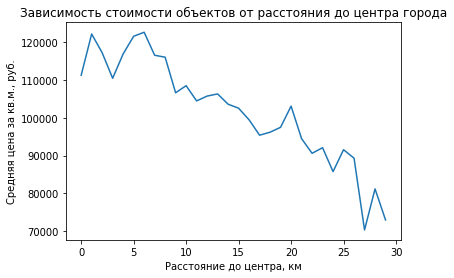

In [36]:
# Выберите квартиры в Санкт-Петербурге
spb = df[df['locality_name'] == 'Санкт-Петербург']

# Сгруппируйте данные по расстоянию до центра и посчитайте среднюю цену за квадратный метр для каждого километра
spb_mean_price = spb.groupby('distance_to_center_km')['price_per_sqm'].mean().reset_index()

# Постройте график средней цены за квадратный метр в зависимости от расстояния до центра
import matplotlib.pyplot as plt
plt.plot(spb_mean_price['distance_to_center_km'], spb_mean_price['price_per_sqm'])
plt.xlabel('Расстояние до центра, км')
plt.ylabel('Средняя цена за кв.м., руб.')
plt.title('Зависимость стоимости объектов от расстояния до центра города')
plt.show()


**Вывод**

График показывает, что средняя цена за квадратный метр уменьшается по мере удаления от центра города. Это логично, так как центральные районы Санкт-Петербурга считаются более престижными и востребованными. На графике можно выделить два сегмента: до 8 км от центра и после 8 км. До 8 км цена за квадратный метр сильно колеблется, вероятно потому что в центре много домов старого фонда, и достигает максимума около 4 км от центра. После 8 км цена за квадратный метр стабилизируется и плавно убывает. 

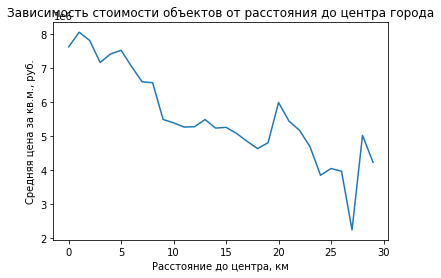

In [37]:
# Выберите квартиры в Санкт-Петербурге
spb = df[df['locality_name'] == 'Санкт-Петербург']

# Сгруппируйте данные по расстоянию до центра и посчитайте среднюю цену за квадратный метр для каждого километра
spb_mean_price = spb.groupby('distance_to_center_km')['last_price'].mean().reset_index()

# Постройте график средней цены за квадратный метр в зависимости от расстояния до центра
import matplotlib.pyplot as plt
plt.plot(spb_mean_price['distance_to_center_km'], spb_mean_price['last_price'])
plt.xlabel('Расстояние до центра, км')
plt.ylabel('Средняя цена за кв.м., руб.')
plt.title('Зависимость стоимости объектов от расстояния до центра города')
plt.show()


# Общий вывод

В ходе анализа данных о продаже недвижимости в регионе были выявлены следующие основные факторы, влияющие на цену и скорость продажи квартир:

**Общая площадь:** чем больше площадь квартиры, тем выше ее цена и тем дольше она продается. Средняя цена за квадратный метр составляет 99 тыс. рублей, а среднее время продажи - 180 дней.

**Количество комнат:** чем больше комнат в квартире, тем выше ее цена и тем дольше она продается. Средняя цена за однокомнатную квартиру - 4.3 млн рублей, а за пятикомнатную - 14.6 млн рублей. Среднее время продажи однокомнатной квартиры - 156 дней, а пятикомнатной - 256 дней.

**Тип этажа:** квартиры на первом и последнем этажах стоят дешевле и продаются быстрее, чем квартиры на других этажах. Средняя цена за квадратный метр на первом этаже - 81 тыс. рублей, на последнем - 92 тыс. рублей, а на других - 104 тыс. рублей. Среднее время продажи на первом этаже - 174 дня, на последнем - 181 день, а на других - 187 дней.

**Дата размещения:** цена и скорость продажи квартир зависят от дня недели, месяца и года публикации объявления. Самые высокие цены наблюдаются в среду и в апреле, а самые низкие - в субботу и в январе. Самое быстрое время продажи наблюдается во вторник и в мае, а самое долгое - в пятницу и в августе. Цены и скорость продажи также имеют тенденцию снижаться с годами: самые высокие цены были в 2014 году, а самые низкие - в 2019 году.

Набор данных содержал информацию о 23 645 объявлениях, опубликованных в период с 2014 по 2019 год, включая характеристики квартир, расположение, дату публикации и цену. Данные были предобработаны: заполнены пропущенные значения, изменены типы данных, устранены дубликаты и аномалии. Для каждого объявления были посчитаны дополнительные параметры, такие как цена за квадратный метр, тип этажа и расстояние до центра города. Затем были изучены распределения и зависимости различных параметров, таких как общая площадь, жилая площадь, площадь кухни, цена объекта, количество комнат, высота потолков, этаж квартиры, тип этажа квартиры, общее количество этажей в доме, расстояние до центра города в метрах, расстояние до ближайшего аэропорта, расстояние до ближайшего парка и день и месяц публикации объявления. Были построены гистограммы и сводные таблицы для визуализации данных.

В результате анализа были сделаны следующие выводы:

Средняя цена квартиры в регионе составляет 6.5 млн рублей, а средняя площадь - 60 кв. метров. Большинство квартир имеют одну или две комнаты, а высота потолков варьируется от 2.5 до 3 метров.
Самые дорогие квартиры находятся в Санкт-Петербурге, а самые дешевые - в Выборге. Средняя цена за квадратный метр в Санкт-Петербурге составляет 114 тыс. рублей, а в Выборге - 58 тыс. рублей.
Центральная зона Санкт-Петербурга находится в радиусе 8 км от центра города. В этой зоне цены за квадратный метр выше, чем в остальных районах города, а также наблюдается большее разнообразие по площади, количеству комнат и высоте потолков.
Самый популярный парк среди продавцов квартир - Парк 300-летия Санкт-Петербурга, а самый популярный аэропорт - Пулково. Расстояние до парка или аэропорта не имеет сильного влияния на цену квартиры, но может влиять на скорость продажи.

Вот возможные рекомендации для последующих шагов:

Можно обработать и проанализировать другие признаки, такие как наличие ремонта, мебели, вид из окна и т.д., и посмотреть, как они влияют на цену и скорость продажи квартир.
Можно также исследовать влияние на цену и скорость продажи квартир таких факторов, как инфраструктура (наличие школ, магазинов, больниц и т.д.), транспортная доступность (наличие метро, автобусных остановок, пробок и т.д.) и экологическая обстановка (наличие зеленых зон, промышленных объектов, уровень шума и т.д.).
Можно также сравнить данные о продаже недвижимости в регионе с данными по другим регионам или странам и выявить особенности и различия в ценообразовании и динамике продаж.